## Outline

* 1 - Importing modules
* 2 - Linear regression with one variable
    * 2.1 Problem Statement
    * 2.2 Dataset
    * 2.3 Refresher on linear regression
    * 2.4 Compute Cost
    * 2.5 Gradient descent
    * 2.6 Learning parameters using batch gradient descent

### 1 - Importing modules

In [36]:
### Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

### 2 - Linear regression with one variable

***
   
### 2.1. Problem Statement

Suppose we are consulting company and we need to prepare a labor market report for next year and predict the average annual salary 
for the labor force in a particular region with the relevant working experience.

We have a dataset with average annual salaries, in US$ for a labor force that corresponds to work experience, in years for particular field 

### 2.2. Dataset

In [37]:
# Reading CSV file ignorring zero cells 
salary_dataset_path = './Salary_dataset.csv'
salary_dataset = pd.read_csv(salary_dataset_path)
salary_dataset.dropna(axis=0)

# Print out the overall dataset
print(salary_dataset)

    Experience_Years  Annual_Salary
0                1.2        39344.0
1                1.4        46206.0
2                1.6        37732.0
3                2.1        43526.0
4                2.3        39892.0
5                3.0        56643.0
6                3.1        60151.0
7                3.3        54446.0
8                3.3        64446.0
9                3.8        57190.0
10               4.0        63219.0
11               4.1        55795.0
12               4.1        56958.0
13               4.2        57082.0
14               4.6        61112.0
15               5.0        67939.0
16               5.2        66030.0
17               5.4        83089.0
18               6.0        81364.0
19               6.1        93941.0
20               6.9        91739.0
21               7.2        98274.0
22               8.0       101303.0
23               8.3       113813.0
24               8.8       109432.0
25               9.1       105583.0
26               9.6       1

In [38]:
# Print out the header of data sets
print(salary_dataset.columns)

Index(['Experience_Years', 'Annual_Salary'], dtype='object')


In [39]:
# Converting column data to list
experience_in_years = salary_dataset['Experience_Years'].tolist()
annual_salary = salary_dataset['Annual_Salary'].tolist()

In [40]:
# Printing out the list of "Years of experience" (to double-check)
print("Type of Experience in years:", type(experience_in_years))
print("First five elements of Experience in years are:\n", experience_in_years[:5])

# Printing out the list of "Annual Salary" (to double-check)
print("Type of Annual Salary:", type(annual_salary))
print("First five elements of Annual Salary are:\n", annual_salary[:5])

Type of Experience in years: <class 'list'>
First five elements of Experience in years are:
 [1.2, 1.4, 1.6, 2.1, 2.3]
Type of Annual Salary: <class 'list'>
First five elements of Annual Salary are:
 [39344.0, 46206.0, 37732.0, 43526.0, 39892.0]


In [41]:
# Check the dimentions of your variables
print("The shape of Experience in years is:", np.array(experience_in_years).shape)
print("The shape of Annual Salary is:", np.array(annual_salary).shape)
print("Number of training examples (m):", len(experience_in_years))

The shape of Experience in years is: (30,)
The shape of Annual Salary is: (30,)
Number of training examples (m): 30


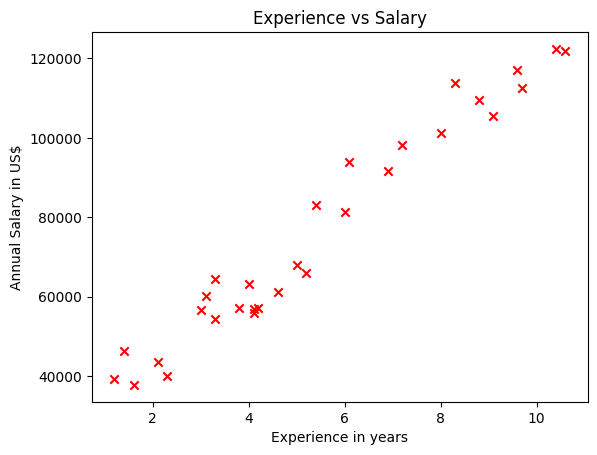

In [42]:
# Visualize the data
# Create a scatter plot of the data. Using marker 'x' with a red color 'r' as parameters
plt.scatter(experience_in_years, annual_salary, marker='x', c='r')

# Set the title
plt.title("Experience vs Salary")
# Set the y-axis
plt.ylabel("Annual Salary in US$")
# Set the x-axis
plt.xlabel("Experience in years")
plt.show()

### 2.3. Refresher on linear regression

***

$$ f_w,_b(x) = wx + b $$

To train a linear regression model, we want to find the best  **(𝑤,𝑏)**  parameters that fit your dataset.
    
To compare how one choice of (𝑤,𝑏)  is better or worse than another choice, you can evaluate it with a cost function  **𝐽(𝑤,𝑏)**

**𝐽**  is a function of  **(𝑤,𝑏)**. That is, the value of the cost  **𝐽(𝑤,𝑏)** depends on the value of (𝑤,𝑏).

The choice of **(𝑤,𝑏)** that fits our data the best is the one that has the smallest cost  **𝐽(𝑤,𝑏)**.

To find the values **(𝑤,𝑏)** that gets the smallest possible cost  **𝐽(𝑤,𝑏)**, we can use a method called ***gradient descent***.

With each step of gradient descent, the  parameters **(𝑤,𝑏)** come closer to the optimal values that will achieve the lowest cost  **𝐽(𝑤,𝑏)**.

The trained linear regression model can then take the input feature  **𝑥** (experience in years) and output a prediction (annual salary for ordinary employee).  $$ 𝑓_𝑤,_𝑏 (𝑥) $$ 


### 2.4. Compute Cost

***

**Cost function** 
 $$ J(w,b) = \frac{1}{2m} \sum_{i=o}^{m-1} (f_w,_b(x^i - y^i))^2 $$

 **Model prediction**

For linear regression with one variable, the prediction of the model 

$$ f_w,_b $$ 
for an example 
$$ x(i) $$ 
is represented as:

$$ f_w,_b(x^i) = w*x^i + b $$ 
  This is the equation for a line, with an intercept  **𝑏** and a slope **𝑤**



**Implementation**


To compute the Costs we introduce the function "compute_cost ()" that should make entermediate iteration before:

Calculate the prediction values of the model:
$$ f_w,_b(x^i) = w*x^i + b $$

Compute cost for each period
$$ cost^i = (f_w,_b - y^i)^2  $$

Return the total cost over all examples
$$ J(w,b) = \frac{1}{2m} \sum_{i=o}^{m-1} cost^i $$

In [43]:
def compute_cost(experience_in_years, annual_salary, w, b):
    
    # Computes the cost function for linear regression.
    
    # Args:
        # experience_in_years (ndarray): Shape (m,) Input to the model (Experience in years) 
        # annual_salary (ndarray): Shape (m,) Label (Average salary for ordinary employee)
        # w, b (scalar): Parameters of the model
    
     # Returns
        # total_cost (float): The cost of using w,b as the parameters for linear regression to fit the data points in experience_in_years and annual_salary

    # number of training examples
    m = np.array(experience_in_years).shape[0]

    # Set up the total costs to zero
    total_cost = 0

    # Variable to keep track of sum of cost from each example
    cost_sum = 0

    # Loop over training examples
    for i in range(m):

        # Gets the prediction "f_wb" for the ith example
        f_wb = w * experience_in_years[i] + b

        # Code the "costs" that associated with the ith example
        cost = (f_wb - annual_salary[i]) ** 2

        # Update thw sum of total cost for each example
        cost_sum = cost_sum + cost 

    # Get the total cost as the sum divided by "(2*m)"
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

In [44]:
# We need check if the implementation was correct by running the following test code:

# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(experience_in_years, annual_salary, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w and b: {cost:.3f}')

<class 'float'>
Cost at initial w and b: 3250507711.545


### 2.5. Gradient descent

*** 

Gradient descent involves repeated steps to adjust the value of your parameter (w,b) to gradually get a smaller cosr J(w,b)

    At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost J(w,b) as (w,b) gets updated.
    In this section, we will implement a fuction to calculate J(w,b) so that you can check the progress of graduent descent implementation.

The graduent descent algorithm is:

    repeat until convergence:
$$ b:= b - \Alpha * \frac{\delta J(w,b)}{\delta (b)} $$

$$ w:= w - \Alpha * \frac{\delta J(w,b)}{\delta (w)} $$

where, parameters **w,b** are both updated simultaneusly and where

$$ \frac {\delta J(w,b)}{\delta (b)} = \frac{1}{m} \sum_{i=o}^{m-1} (f_w,b(x^i) - y^i)  $$

$$ \frac {\delta J(w,b)}{\delta (w)} = \frac{1}{m} \sum_{i=o}^{m-1} (f_w,b(x^i) - y^i) * x^i  $$

'm' is the number of training examples in the dataset;

$$ f_w,b(x^i) $$ 
is the model's prediction, where 

$$ y^i $$

, is the target value

We need implement a fuction called "comute_graduent" which calculates 
$$ \frac{\delta J(w)}{\delta (w)} $$  
   
$$ \frac{\delta J(w)}{\delta (b)} $$

In [45]:
def compute_gradient(experience_in_years, annual_salary, w, b):
    
    # Computes the gradient for linear regression.
    
     # Args:
        # experience_in_years (ndarray): Shape (m,) Input to the model (Experience in years) 
        # annual_salary (ndarray): Shape (m,) Label (Average salary for ordinary employee)
        # w, b (scalar): Parameters of the model
    
    # Returns
        # dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
        # dj_db (scalar): The gradient of the cost w.r.t. the parameter b

    # number of training examples
    m = np.array(experience_in_years).shape[0]

    # Set up the derivatives of the cost w.r.t. the paremeters w and parameter b to zero
    dj_dw = 0
    dj_db = 0

    # Loop over examples
    for i in range(m):

        # Gets the prediction "f_wb" for the ith example
        f_wb = w * experience_in_years[i] + b

        # Code the gradient for "w" from the ith example
        dj_dw_i = (f_wb - annual_salary[i]) * experience_in_years[i]

        # Code the gradient for "b" from the ith example
        dj_db_i = (f_wb - annual_salary[i])

        # Update the sum of "dj_db": 
        dj_db += dj_db_i

        # Update the sum of "dj_dw": 
        dj_dw += dj_dw_i

    # Devide both ""dj_dw"" and "dj_db" by "m"
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [46]:
# We need check if the implementation was correct by running the following test code:

# TEST 1. Compute cost with some initial values for paramaters w, b
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(experience_in_years, annual_salary, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -485004.4133333334 -76004.0


In [47]:
# TEST 2. Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(experience_in_years, annual_salary, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -484995.9128 -76002.71733333333


### 2.6 Learning parameters using batch gradient descent

***

We need now to find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.

A good way to verify that gradient descent is working correctly is to look at the value of  **𝐽(𝑤,𝑏)**  and check that it is decreasing with each step.

Assuming that implementing of the gradient and computing the cost correctly yields an appropriate value for the learning rate alpha,  **𝐽(𝑤,𝑏)** and it should never increase and should converge to a steady value by the end of the algorithm.


In [49]:
def gradient_descent(experience_in_years, annual_salary, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    # Performs batch gradient to learn theta. Updates theta by taking num_iters gradient steps with learning rate alpha

    # Args:
        # experience_in_years (ndarray): Shape (m,) Input to the model (Experience in years) 
        # annual_salary (ndarray): Shape (m,) Label (Average salary for ordinary employee)
        # w_in, b_in (scalar): Initial values of parameters of the model
        # cost_function: function to compute  the gradient
        # gradient_function: function to compute the gradient
        # alpha: (float) Learning rate
        # num_iters: (int) number of iterations to run gradient descent
    
    # Returns
        # w : (ndarray): Shape (1,) Updated values of parameters of the model after running gradient descent
        # b : (scalar)              Updated value of parameter of the model after running gradient descent
        

    # number of training examples
    m = len(experience_in_years)

    # An array to store cost "J" and "w's" at each iteration - primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)   # To avoid modifying global "w" within function
    b = b_in

    # Loop over iterations
    for i in range(num_iters):

        # Calculate the gradint and update the parameters
        dj_dw, dj_db = gradient_function(experience_in_years, annual_salary, w, b)

        # Update Parameters using "w", "b", "alpha" and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost "J" at each iteration
        if i < 100000:   # Prevent resource exhaustion
            cost = cost_function(experience_in_years, annual_salary, w, b)
            J_history.append(cost)

        # Print every cost out at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}  ")

    return w, b, J_history, w_history    # Return "w", "b" and "J_history", "w_history" for graphing


# We need check if the implementation was correct by running the following test code:

# TEST 1. Run the dradient descent algorithm above to learn the parameters for out dataset.

# Initialize fitting parameters. recall that the shape of "w" is (n,)
initial_w = 0.0
initial_b = 0.0

# Make some gradient descent setting
iterations = 1500
alpha = 0.01


w,b,_,_ = gradient_descent(experience_in_years, annual_salary, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w, b found by gradient descent:", w, b)

Iteration    0: Cost 1297963218.56  
Iteration  150: Cost 45381207.51  
Iteration  300: Cost 31682912.19  
Iteration  450: Cost 24292859.57  
Iteration  600: Cost 20306022.06  
Iteration  750: Cost 18155174.94  
Iteration  900: Cost 16994820.83  
Iteration 1050: Cost 16368824.83  
Iteration 1200: Cost 16031108.12  
Iteration 1350: Cost 15848914.33  
w, b found by gradient descent: 9604.00088842628 23798.659745329478


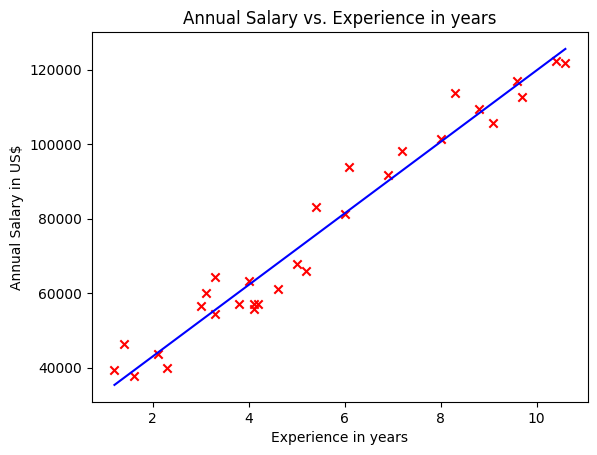

In [50]:
# Now we have a fill list of parameters from gradient descent to plot the linear fit.

# Recall that we can get the prediction for a single example $$ f(x^(i)) = wx^(i) + b $$

# To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

# number of training examples
m = np.array(experience_in_years).shape[0]
# Create a zero vector
predicted = np.zeros(m)

# Loop over examples
for i in range(m):
    predicted[i] = w * experience_in_years[i] + b

# We now implement the predicted values to see the linear fit.

# Plot the linear fit
plt.plot(experience_in_years, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(experience_in_years, annual_salary, marker='x', c='r') 

# Set the title
plt.title("Annual Salary vs. Experience in years")
# Set the y-axis label
plt.ylabel("Annual Salary in US$")
# Set the x-axis label
plt.xlabel("Experience in years")
plt.show()

In [51]:
# Using the final values of "w" and "b" for making predictions on annual salary. Let's predict what the annual salary the employee has with 0.5 year and 0.75 respectively.

# The model takes in experience_in_year of the employee on the base of 1 year as an input.
# Therefore, 0.5 year can be translated into the model as np.array([0.5])
# Similarly, 0.75 year can be translated into the model as np.array([0.75])

predict1 = 0.5 * w + b
print("For Work experience with 0.5 year, we predict an Annual Salary of $%.2f" % predict1)

predict2 = 0.75 * w + b
print("For Work experience with 0.75 year, we predict an Annual Salary of $%.2f" % predict2)

For Work experience with 0.5 year, we predict an Annual Salary of $28600.66
For Work experience with 0.75 year, we predict an Annual Salary of $31001.66
